# Multiple Linear Regression
Applying multiple linear regression analysis to sample data from `csv` files.
The `statsmodel.api` library is used to provide regression analysis. 

In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## Read Data From CSV
Data from the `happy.csv` file will be used for the regression analysis.

In [4]:
data = pd.read_csv('happy.csv', index_col=0)
data.head()

,very happy,gdp/capita,cpi
country,,,
Venezuela,55,13500,79.32
Nigeria,45,2700,49.13
Iceland,42,39700,81.85
Philippines,40,4400,25.78
Netherlands,40,41500,71.60


## Define Dependant and Independant Variables
The `x` value *(independant)* is based on the combination of GDP per Capita and CPI. 
The `y` value *(dependant)* is based on the happiness score from the `very happy` column.

In [5]:
x = data[['gdp/capita', 'cpi']]
y = data['very happy']

## Regression Analysis
Calculate the multiple linear regression results using the **Ordinary Least Squares (OLS)** method from the `statsmodel.api` library and display the results of the calculation.

In [7]:
import warnings
warnings.filterwarnings('ignore') # Ignore the n>20 warning as the sample size is under 20

x_c = sm.add_constant(x)
results = sm.OLS(y,x_c).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             very happy   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     5.508
Date:                Fri, 22 Jul 2022   Prob (F-statistic):             0.0244
Time:                        09:30:25   Log-Likelihood:                -35.308
No. Observations:                  13   AIC:                             76.62
Df Residuals:                      10   BIC:                             78.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4547      3.840     10.276      0.000      30.899      48.010
gdp/capita    -0.0003   9.36e-05     -3.317      0.008      -0.001      -0.000
cpi            0.1526      0.070      2.173      0.055      -0.004       0.309
==============================================================================
Omnibus:                        3.022   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                1.846
Skew:                           0.912   Prob(JB):                        0.397
Kurtosis:                       2.722   Cond. No.                     1.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual Analysis
Plot charts for analysing the residuals from the regression for the `gdp/capita` and the `cpi` data.

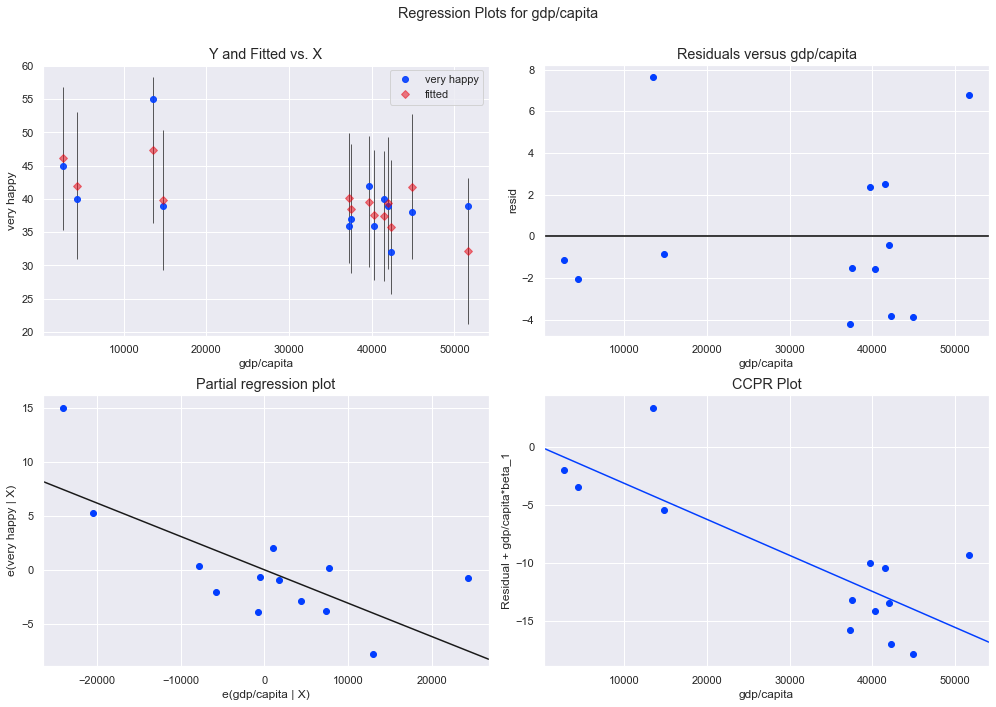

In [15]:
sns.set_theme(style='darkgrid', palette='bright')
# Residual analysis for gdp/capita
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(results, 'gdp/capita', fig=fig)

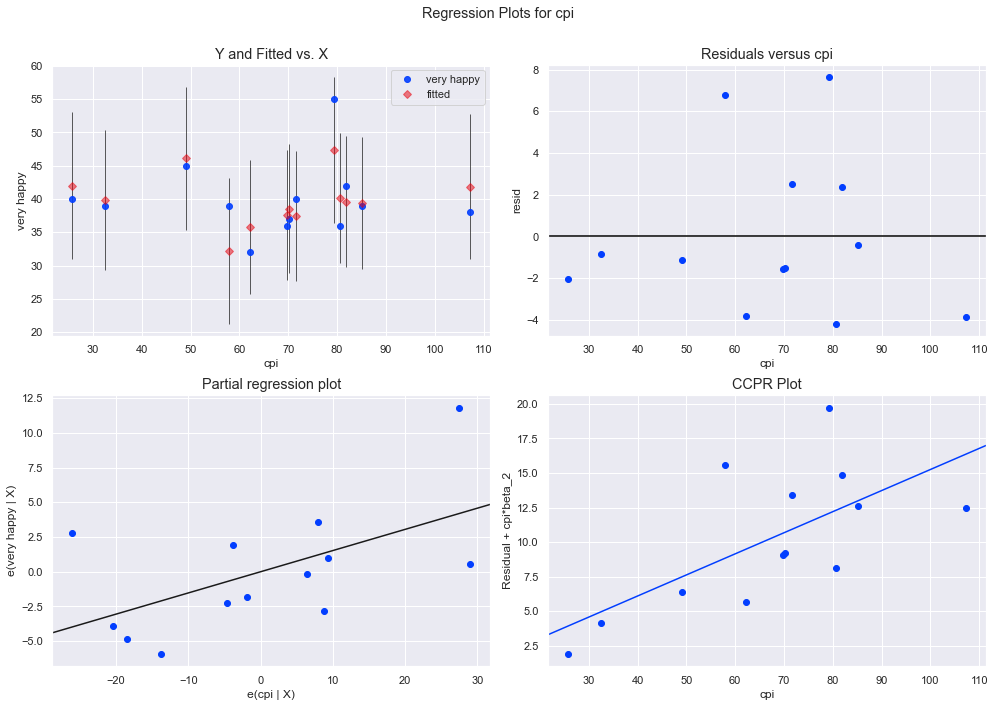

In [16]:
# Residual analysis for cpi
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(results, 'cpi', fig=fig)